<a href="https://colab.research.google.com/github/93gad/mit34_sa_0.2/blob/main/SA_RNN_TFKERAS_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl 


# Импорт данных

In [2]:
!gdown --id 10v9w9Ss2luAUUuDXWVe25zTfNe_JHUNY
!gdown --id 1ZL95-9w8CxbBsy1XOt71ogGbQ4vtMgm8
!gdown --id 1RpwycKq2lh7ao4bzI6dDrRGU8rVyiiD4
!gdown --id 1NQIZ-isAeIqxq2Z2K5Sgw19KhnJJkw0U

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10v9w9Ss2luAUUuDXWVe25zTfNe_JHUNY
To: /content/test.csv
100% 10.5M/10.5M [00:00<00:00, 58.4MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZL95-9w8CxbBsy1XOt71ogGbQ4vtMgm8
To: /content/train.csv
100% 44.1M/44.1M [00:00<00:00, 199MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Rpwy

In [3]:
!ls

 sample_data   test.csv   train2.csv  'train2 - train.csv'   train.csv


In [4]:
train = pd.read_csv('train2 - train.csv', 
                    header=None, 
                    names=['Review', 'Class'],)
test = pd.read_csv('test.csv', 
                    header=None, 
                    names=['Review', 'Class'],)

In [107]:
train['Class'].value_counts()


1    5438
0    1185
Name: Class, dtype: int64

In [5]:
train

,Review,Class
0,досудебное расследование по факту покупки енпф...,0
1,infokz января портал центразия со ссылкой...,0
2,трлн тенге пенсионных накоплений казахстанцев ...,1
3,южноказахстанская мукомольная компания увеличи...,1
4,тэц не является причиной смога в астане всему ...,1
...,...,...
6618,нефть подорожала после землетрясений в турции ...,0
6619,число жертв землетрясения в сирии возросло до ...,0
6620,рост госпитализации больных c пневмонией отмеч...,0
6621,банный комплекс загорелся изза утечки газа в а...,0


In [6]:
x_train_text = train['Review']

In [7]:
x_test_text = test['Review']

In [8]:
print("Размер набора для обучения: ", len(x_train_text))
print("Размер набора для тестирования:  ", len(x_test_text))

Размер набора для обучения:  6623
Размер набора для тестирования:   1654


In [9]:
data_text = x_train_text + x_test_text

In [10]:
x_train_text[1]

'infokz  января     портал центразия со ссылкой на свои источники в астане сообщил об аресте бывшего заместителя руководителя администрации президента баглана майлыбаева сообщает инфоkz   официального подтверждения этой информации нет   в статье портала центразия даны несколько версий причины ареста причиной могут быть с хищения  млрд тенге выделенных на политические и исторические исследования по другой версии арест майлыбаева связан с делом в рамках которого арестован эксминистр куандык бишимбаев  хищения в холдинге байтерек   на днях президент освободил баглана майлыбаева от должности заместителя руководителя своей администрации давайте вспомним чем известен баглан асаубаевич и какие должности он занимал   биография   баглан асаубаевич майлыбаев появился на свет в джамбуле ныне тараз  мая  года по первой специальности он журналист окончил в  году альмаматер большинства казахстанских тружеников пера и микрофона  казгу имени альфараби   спустя два года он получил второе образование в 

In [11]:
train['Class'].fillna(0, inplace=True)
train['Class'] = train['Class'].astype(int)

In [12]:
y_train = train['Class'].astype(int)

In [13]:
test['Class'].fillna(0, inplace=True)
test['Class'] = test['Class'].astype(int)

In [14]:
y_test = test['Class'].astype(int)

In [15]:
y_train[1]

0

In [16]:
num_words = 10000

In [17]:
tokenizer = Tokenizer(num_words=num_words)

In [18]:
%%time

data_text = [data_text for data_text in data_text if isinstance(data_text, str)]
tokenizer.fit_on_texts(data_text)


CPU times: user 3.32 s, sys: 62.5 ms, total: 3.39 s
Wall time: 4.02 s


In [19]:
tokenizer.word_index

{'в': 1,
 'и': 2,
 'на': 3,
 'по': 4,
 'с': 5,
 'что': 6,
 'не': 7,
 'года': 8,
 'для': 9,
 'за': 10,
 'тенге': 11,
 'а': 12,
 'к': 13,
 'из': 14,
 'это': 15,
 'как': 16,
 'о': 17,
 'до': 18,
 'от': 19,
 'году': 20,
 'мы': 21,
 'также': 22,
 'казахстана': 23,
 'ао': 24,
 'казахстан': 25,
 'будет': 26,
 'но': 27,
 'при': 28,
 'рк': 29,
 'млрд': 30,
 'области': 31,
 'все': 32,
 'у': 33,
 'то': 34,
 'его': 35,
 'этом': 36,
 'республики': 37,
 'он': 38,
 'лет': 39,
 'более': 40,
 'или': 41,
 'так': 42,
 'было': 43,
 'развития': 44,
 'их': 45,
 'уже': 46,
 'том': 47,
 'время': 48,
 'которые': 49,
 'есть': 50,
 'только': 51,
 'был': 52,
 'алматы': 53,
 'енпф': 54,
 'же': 55,
 'если': 56,
 'я': 57,
 'банка': 58,
 'казахстане': 59,
 'год': 60,
 'компании': 61,
 'будут': 62,
 'млн': 63,
 'со': 64,
 'были': 65,
 'того': 66,
 'назад': 67,
 'они': 68,
 'об': 69,
 'страны': 70,
 'тоо': 71,
 'является': 72,
 'экономики': 73,
 'банк': 74,
 'еще': 75,
 'рамках': 76,
 'сегодня': 77,
 'который': 78,
 'ч

In [20]:
x_train_text = [str(text) if isinstance(text, float) else text for text in x_train_text]


In [21]:
x_train_tokens = tokenizer.texts_to_sequences(x_train_text)


In [22]:
x_train_text[1]

'infokz  января     портал центразия со ссылкой на свои источники в астане сообщил об аресте бывшего заместителя руководителя администрации президента баглана майлыбаева сообщает инфоkz   официального подтверждения этой информации нет   в статье портала центразия даны несколько версий причины ареста причиной могут быть с хищения  млрд тенге выделенных на политические и исторические исследования по другой версии арест майлыбаева связан с делом в рамках которого арестован эксминистр куандык бишимбаев  хищения в холдинге байтерек   на днях президент освободил баглана майлыбаева от должности заместителя руководителя своей администрации давайте вспомним чем известен баглан асаубаевич и какие должности он занимал   биография   баглан асаубаевич майлыбаев появился на свет в джамбуле ныне тараз  мая  года по первой специальности он журналист окончил в  году альмаматер большинства казахстанских тружеников пера и микрофона  казгу имени альфараби   спустя два года он получил второе образование в 

In [23]:
np.array(x_train_tokens[0])

array([1568,  839,    4, 1025, 1503,   54, 4464,  767,   71,  532,  533,
         43, 3013,    4, 2437,  131,   58,   29,  201,   97,  134,  606,
        573,  801,    2,  434,  279,  268,   23, 1132, 3106, 4889,    9,
       4208, 1142,  277, 2206,  131,   58, 3787,   19,  177,    8,   43,
       2206,  131,   58,    1, 2572,  978,  231,  377, 1162, 8829, 4988,
       4209,  187,  569,  177,    8, 1825,    1, 2572,  978,   15,   34,
          6,   57, 1740,    3,   77, 4032, 2207,  814, 1305,  176, 3106,
         87,    1, 1646, 2257,    6,    7, 3609,    6,  277, 4889,    9,
       1083,   54,   87, 1182,  499, 1083,    1,   24,  751, 1183,  892,
        206,  404,  131,   58,  588,    6, 2130, 3361,    4, 3152,   24,
         54,    1,  255, 1298,  809,  215,   22,    1, 4304,    6,    4,
       2629,   54,    3,  178,    1,  616,   30, 1729,  405,    1, 1646,
          6,  869, 6309,    7,  222,  716,  589,   56,  191, 1342, 1363,
          1, 1906, 1391,  103, 2380,    2, 1195, 28

In [24]:
x_test_tokens = tokenizer.texts_to_sequences(x_test_text)

Рекуррентная нейронная сеть может принимать последовательности произвольной длины в качестве входных данных, но для того, чтобы использовать весь пакет данных, последовательности должны иметь одинаковую длину. Но мы не можем взять длину самого длинного обзора и добавить столько нулей к более коротким обзорам, потому что это займет много памяти, поэтому мы должны определить конкретную длину, которая будет достаточной для большинства наших данных

In [25]:
num_tokens = np.array([len(tokens) for tokens in x_train_tokens + x_test_tokens])


In [26]:
np.mean(num_tokens)

365.7327534130724

In [27]:
np.max(num_tokens)

7171

In [28]:
np.min(num_tokens)

0

## Визуализация длины токена

In [29]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens = 1558

In [30]:
str(np.sum(num_tokens < max_tokens) / len(num_tokens) * 100) +' %' 

'96.32717168056058 %'

In [31]:
pad = 'pre'

In [32]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [33]:
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

In [34]:
x_train_pad.shape

(6623, 1558)

In [35]:
x_test_pad.shape

(1654, 1558)

In [36]:
np.array(x_train_tokens[1])

array([8830,   89, 3107,   64,  587,    3,  234, 3660,    1,  248,  201,
         69, 4567, 1515,  755,  503,  747,  110, 8831, 2808,  236, 2736,
       4117,  146,  161,  148,    1, 1046, 4210,  266, 3108, 6144, 1805,
        195,  130,    5, 4378,   30,   11, 2230,    3, 5793,    2, 9202,
       1184,    4,  683, 2469, 1792, 2808, 6145,    5, 5384,    1,   76,
        346, 3480, 4379,  874,  425, 4378,    1, 4305,  274,    3, 5132,
        143, 8831, 2808,   19,  256,  755,  503,  326,  747, 2880, 9203,
        122, 6310, 5794,    2,  699,  256,   38, 1541, 5794, 2665, 4784,
          3, 2839,    1, 2539, 3870, 1047,    8,    4,  663, 1592,   38,
       4568,  394,    1,   20, 3306,  330,    2,  642, 1516, 2412,  184,
          8,   38,  693, 1072, 1212,    1,  645, 1014, 7124,    1,    3,
       1775, 4306,    2,  570,  110,    5,    4,  141, 2665,  607, 9204,
        570,   83,    2,  524, 1014,  955,    2, 9592,    1, 2699, 3014,
       3417,  446,  916,    2, 1666, 6695,  642, 64

In [37]:
np.array(x_train_pad[1])

array([   0,    0,    0, ...,  278, 2349, 6671], dtype=int32)

In [38]:
num_tokens_pad = np.concatenate((np.array([len(tokens) for tokens in x_train_pad]), 
                                 np.array([len(tokens) for tokens in x_test_pad])))


## Создание рекуррентной нейронной сети



In [39]:
model = Sequential()

In [40]:
embedding_size = 8

In [41]:
model.add(Embedding(input_dim=num_words,
                   output_dim=embedding_size,
                   input_length=max_tokens,
                   ))

In [42]:
model.add(GRU(units=16, return_sequences=True))

In [43]:
model.add(tf.keras.layers.Dropout(0.5))

In [44]:
model.add(GRU(units=8, return_sequences=True))

In [45]:
model.add(GRU(units=4))

In [46]:
model.add(Dense(1, activation='sigmoid'))\
#

In [47]:
optimizer = Adam(lr=1e-3)

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1558, 8)           80000     
                                                                 
 gru (GRU)                   (None, 1558, 16)          1248      
                                                                 
 dropout (Dropout)           (None, 1558, 16)          0         
                                                                 
 gru_1 (GRU)                 (None, 1558, 8)           624       
                                                                 
 gru_2 (GRU)                 (None, 4)                 168       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 82,045
Trainable params: 82,045
Non-traina

In [50]:
%%time
history=model.fit(x_train_pad, y_train,
          validation_split=0.05, epochs=3, batch_size=50)

# one epoch = один прямой проход и один обратный проход всех обучающих примеров
# batch size = количество обучающих примеров за один прямой / обратный проход

Epoch 1/3
126/126 [==============================] - 24s 116ms/step - loss: 0.5024 - accuracy: 0.8193 - val_loss: 0.4943 - val_accuracy: 0.7952
Epoch 2/3
126/126 [==============================] - 14s 108ms/step - loss: 0.3773 - accuracy: 0.8449 - val_loss: 0.3877 - val_accuracy: 0.8373
Epoch 3/3
126/126 [==============================] - 14s 108ms/step - loss: 0.2345 - accuracy: 0.9164 - val_loss: 0.3886 - val_accuracy: 0.8313
CPU times: user 45.3 s, sys: 1.19 s, total: 46.5 s
Wall time: 1min 26s


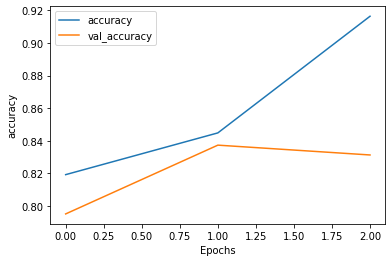

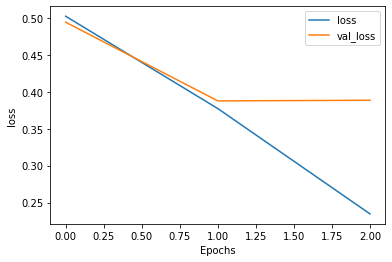

In [51]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [52]:
%%time
result = model.evaluate(x_test_pad, y_test)

52/52 [==============================] - 3s 49ms/step - loss: 0.3844 - accuracy: 0.8458
CPU times: user 2.43 s, sys: 93.5 ms, total: 2.52 s
Wall time: 2.69 s


In [53]:
print("Точность: {0:.2%}".format(result[1]))

Точность: 84.58%


In [69]:
positive_review='''На чемпионате Азии по легкой атлетике в помещении в Астане сборная Казахстана заняла весь пьедестал в соревнованиях по прыжкам в высоту среди женщин, передает NUR.KZ. На первом месте расположилась Надежда Дубовицкая с результатом 1,89 метра. Серебряную медаль завоевала Кристина Овчинникова, показавшая также 1,89. Замкнула тройку лучших Елизавета Матвеева - 1,84. Таким образом, в активе сборной Казахстана три "золота". Ранее первыми стали Каролин Кипкируи в беге на 3000 метров и Элина Михина. Она выиграла финальный забег на 400 метров. Михаил Литвин принес команде "серебро" (400 метров), Акбаян Нурмамет стала третьей в беге на 1500 метров. На втором месте завершила ЧА Ольга Сафронова (60 метров). Читайте больше: https://www.nur.kz/sport/athletics/2009061-kazahstan-zavoeval-tri-medali-na-chempionate-azii-po-legkoy-atletike-v-pomeschenii/'''

negative_review='''число жертв землетрясения в турции превысило  тысяч число жертв землетрясений с эпицентром в турецком кахраманмараше достигло   человек пострадали   жителей об этом сообщил президент турции реджеп тайип эрдоган передает миа казинформ со ссылкой на анадолукак заявил глава страны реджеп тайип эрдоган в поисковоспасательных и гуманитарных работах в  провинциях зоны бедствия задействованы более  тысячи человек включая спасателей изза рубежаглава государства выразил благодарность каждому кто вносит вклад в устранение последствий разрушительных землетрясений на юге странытурецкий лидер подчеркнул что государство готово к поддержке граждан пострадавших изза стихийного бедствияон призвал население зоны бедствия всецело доверять государству в вопросе устранения последствий землетрясенияпрезидент турции сообщил что домовладельцам разместившим семьи из зоны бедствия будет выплачиваться по  тысяч турецких лир в месяц а тем кто арендует жилье  по  тысячи лирмежду тем в турции начались судебные расследования в отношении тех кто строил здания и ответственных лиц в провинциях подвергшихся землетрясению об этом заявил министр юстиции бекир боздаг ознакомившийся со спасательными работами в районе баглар в диярбакыренапомним  февраля в районе пазарджык провинции кахраманмараш на юговостоке турции произошло землетрясение магнитудой  в десяти провинциях турции введен режим чп сроком на  дней президент реджеп тайип эрдоган объявил в турции семидневный общенациональный траур по жертвам стихийного бедствия государственные флаги турции приспущены на всей территории страныразрушительное землетрясение ощутили и в соседних странах в том числе в сирии ливане трск греческом кипре и ираке'''

text=[positive_review,negative_review]

In [70]:
tokens = tokenizer.texts_to_sequences(text)

In [ ]:
tokens

In [71]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens,
                           padding=pad, truncating='pre')

In [58]:
tokens_pad

array([[   0,    0,    0, ...,    2, 4862, 3655],
       [   0,    0,    0, ...,    1, 9937,    2]], dtype=int32)

In [72]:
tokens_pad.shape

(2, 1558)

In [73]:
a=model.predict(tokens_pad)[0]

1/1 [==============================] - 0s 74ms/step


In [74]:
b=model.predict(tokens_pad)[1]

1/1 [==============================] - 0s 84ms/step


In [75]:
print('Позитивный текст с оценкой {} '.format(a[0]))
print('Негативный текст с оценкой {} '.format(b[0]))

Позитивный текст с оценкой 0.950210452079773 
Негативный текст с оценкой 0.3415139615535736 


# Проверка на неизвестных данных

In [63]:
!gdown --id 1rJM2BuOyY4VdFo6oZ_Qu6fdRTWN4FVHq

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rJM2BuOyY4VdFo6oZ_Qu6fdRTWN4FVHq
To: /content/items_v2.csv
100% 2.92M/2.92M [00:00<00:00, 187MB/s]


In [64]:
items = pd.read_csv('items_v2.csv', 
                    header=None, 
                    names=['Review', 'Class'],)

In [65]:
items

,Review,Class
0,рост госпитализации больных c пневмонией отмеч...,1
1,долю в обслуживающем мусорный полигон предприя...,1
2,число жертв землетрясений в турции превысило ...,1
3,предотвратить подтопление города талыми водами...,1
4,банный комплекс загорелся изза утечки газа в а...,1
...,...,...
996,Уникальное месторождение подземных вод «Кокжид...,1
997,Касым-Жомарт Токаев подписал указ о создании Н...,1
998,Одиннадцать медалей завоевали казахстанские бо...,1
999,Сколько сел в Казахстане подключено к Интернет...,1


# Обработка

In [108]:
%%time
import time
from multiprocessing import Process
import threading
from time import perf_counter

results = pd.DataFrame(columns=['Review','Class'])

def test_items(review):
    tokens = tokenizer.texts_to_sequences([str(review).lower()])
    tokens_pad = pad_sequences(tokens, maxlen=max_tokens,
                            padding=pad, truncating='pre')
    tokens_pad.shape
    a = model.predict(tokens_pad)[0]

if __name__ == '__main__':
  start_time = perf_counter()
  for review in items['Review']:
    test_items(review)
  
  end_time = perf_counter()
  print(end_time - start_time)


1/1 [==============================] - 0s 57ms/step
116.00731727499988
CPU times: user 1min 42s, sys: 2.51 s, total: 1min 44s
Wall time: 1min 56s


# Многопроцессорная обработка

In [85]:
%%time
import time
from multiprocessing import Process
import threading
from time import perf_counter

results = pd.DataFrame(columns=['Review','Class'])

def test_items(review):
    tokens = tokenizer.texts_to_sequences([str(review).lower()])
    tokens_pad = pad_sequences(tokens, maxlen=max_tokens,
                            padding=pad, truncating='pre')
    tokens_pad.shape
    a = model.predict(tokens_pad)[0]
    print(a, review)

if __name__ == '__main__':
    start_time = perf_counter()
    processes = []
    for review in items['Review']:
        p = Process(target=test_items, args=(review,))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
    
    end_time = perf_counter()
    print(end_time - start_time)



49.587384922999945
CPU times: user 1.97 s, sys: 30.5 s, total: 32.5 s
Wall time: 49.6 s
